<a href="https://colab.research.google.com/github/dho619/TCC_Pos_IA/blob/main/AnaliseExploracaoDosDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('./Walmart.csv')
#df.info()

In [73]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo TratamentoDosDados.ipynb
def TratarDadosBaseWalmart(df):
  df.Date=pd.to_datetime(df.Date, format='%d-%m-%Y')
  df['Day'] = df.Date.dt.day
  df['Month'] = df.Date.dt.month
  df['Year'] = df.Date.dt.year
  df.drop(['Date'], axis=1, inplace=True)

  df.drop_duplicates(inplace=True)

  ignoreFeatures = ['Weekly_Sales', 'Day']
  maximumToBeCategorical = 45
  features = [i for i in df.columns if i not in ignoreFeatures]
  uniqueValuesForFeature = df[features].nunique().sort_values()
  categoricalFeature = [];
  valuesFeature = [];
  for i in range(df[features].shape[1]):
      if uniqueValuesForFeature.values[i]<=maximumToBeCategorical:
          categoricalFeature.append(uniqueValuesForFeature.index[i])
      else:
          valuesFeature.append(uniqueValuesForFeature.index[i])
  for i in categoricalFeature:
    if df[i].nunique()==2:
        df[i]=pd.get_dummies(df[i], drop_first=True, prefix=str(i))
    if (df[i].nunique()>2):
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], prefix=str(i)))],axis=1)
    
  return df

In [74]:
df_original = df.copy(deep=True)

In [ ]:
df = TratarDadosBaseWalmart(df)
#df.info()

### Criando df para exibir informações de vendas em todas lojas juntas

In [75]:
df2 = df_original[['Date', 'Weekly_Sales']]
df2['Date2']=pd.to_datetime(df2.Date, format='%d-%m-%Y')
df2['MonthYear'] = df2.Date2.dt.to_period('M').astype(str)
df2.sort_values(by=['MonthYear'],inplace=True)
df2['MonthYear'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

array(['2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07',
       '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01',
       '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07',
       '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01',
       '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07',
       '2012-08', '2012-09', '2012-10'], dtype=object)

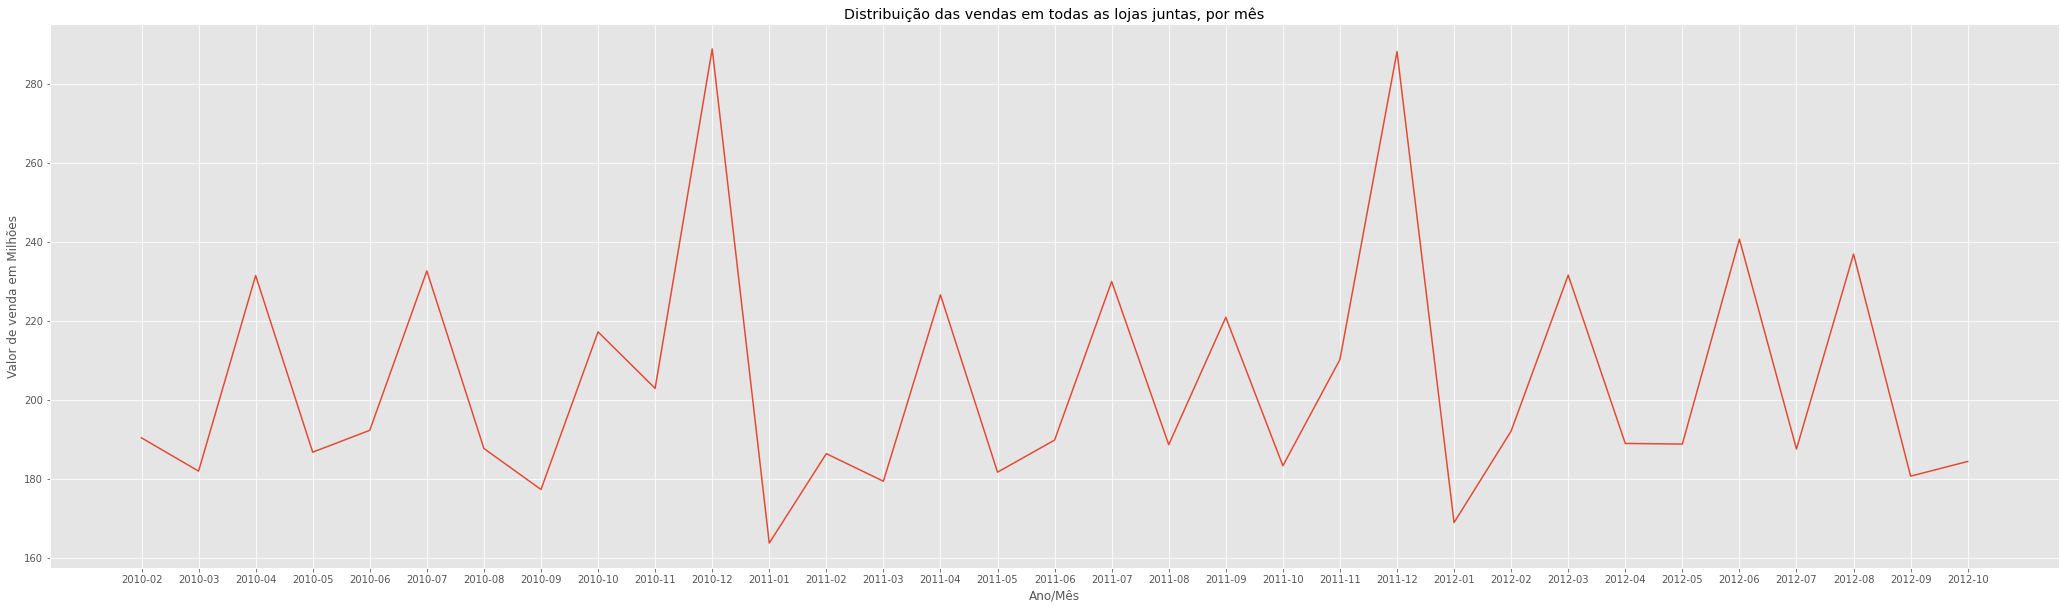

In [55]:
plt.style.use("ggplot")
plt.figure(figsize = (36, 10))
plt.plot(df2['MonthYear'].unique(), df2.groupby(['MonthYear']).sum()['Weekly_Sales']/1000000)
plt.title('Distribuição das vendas em todas as lojas juntas, por mês')
plt.xlabel("Ano/Mês")
plt.ylabel("Valor de venda em Milhões")
plt.show()

In [70]:
#Exibindo algumas estastísticas e o detalhamento das vendas em miçhões por mês
df3 = df2.groupby(['MonthYear']).sum()['Weekly_Sales']/1000000
print('Média: {}\nMínimo: {}\nMáximo: {}\n'.format(df3.mean(), df3.min(), df3.max()))
df3

Média: 204.15815112454547
Mínimo: 163.70396683
Máximo: 288.76053272



MonthYear
2010-02    190.332983
2010-03    181.919803
2010-04    231.412368
2010-05    186.710934
2010-06    192.246172
2010-07    232.580126
2010-08    187.640111
2010-09    177.267896
2010-10    217.161824
2010-11    202.853370
2010-12    288.760533
2011-01    163.703967
2011-02    186.331328
2011-03    179.356448
2011-04    226.526511
2011-05    181.648158
2011-06    189.773385
2011-07    229.911399
2011-08    188.599332
2011-09    220.847738
2011-10    183.261283
2011-11    210.162355
2011-12    288.078102
2012-01    168.894472
2012-02    192.063580
2012-03    231.509650
2012-04    188.920906
2012-05    188.766479
2012-06    240.610329
2012-07    187.509452
2012-08    236.850766
2012-09    180.645544
2012-10    184.361680
Name: Weekly_Sales, dtype: float64